**Problem Statement**   
Predictive analysis to predict the likelihood of diabetes in a patient.

In [2]:
#Import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning) 

In [3]:
#Import Dataset
diabetes_dataset = pd.read_csv('data/diabetes.csv')
diabetes_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
#clone the dataset

data = diabetes_dataset

**Data cleaning**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.shape

(768, 9)

In [8]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data["Outcome"] = data["Outcome"].map({0:'No', 1:'Yes'}) #encoding the outcome to show yes and no for 1 and 0 respectively

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [11]:
data['Age'].value_counts().sort_index()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: count, dtype: int64

In [12]:
def AgeCategory(value):
    result = value.apply(lambda x: 
        "Aged O to 24" if 0 <= x <= 24
        else ("Aged 25 to 34") if 25 <= x <= 34
        else ("Aged 35 to 44" if 35 <= x <= 44
        else ("Aged 45 to 64") if 45 <= x <= 64
        else ("Aged 65 to 84" if 65 <= x <= 84
        else ("Aged 85 to 100") if 85 <= x <= 100 else np.nan)))
    return result

# Apply the AgeCategory function to the 'Age' column and create a new column 'Age_category'
data['Age_category'] = AgeCategory(data['Age'])

data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148,72,35,0,33.6,0.627,50,Yes,Aged 45 to 64
1,1,85,66,29,0,26.6,0.351,31,No,Aged 25 to 34


**Exploratory data analysis (EDA)**

Patients demograph

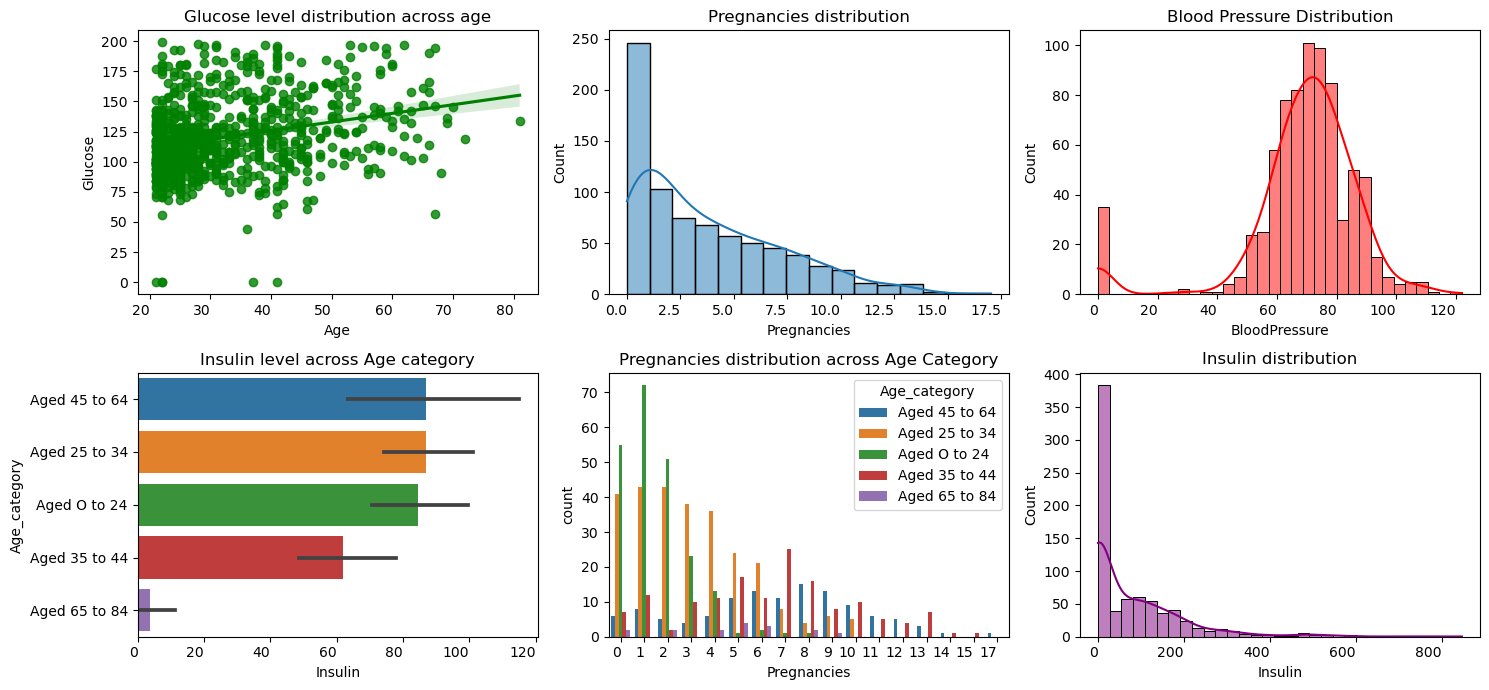

In [13]:
fig, ax = plt.subplots(2,3, figsize=(15,7))

sns.regplot(x='Age', y='Glucose', data=data, color='Green', ax=ax[0,0]).set_title('Glucose level distribution across age')
sns.histplot(x='Pregnancies', kde=True, data=data, ax=ax[0,1]).set_title('Pregnancies distribution')
sns.histplot(x='BloodPressure', kde=True, data=data, color='Red', ax=ax[0,2]).set_title('Blood Pressure Distribution')
sns.barplot(x='Insulin', y='Age_category', data=data, ax=ax[1,0]).set_title('Insulin level across Age category')
sns.countplot(x='Pregnancies', hue='Age_category', data=data, ax=ax[1,1]).set_title("Pregnancies distribution across Age Category")
sns.histplot(x='Insulin', kde=True, data=data, color='Purple',ax=ax[1,2]).set_title('Insulin distribution')

for axes_row in ax:
        for axes in axes_row:
                if axes is not None:
                        axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha='right')
                        axes.set_title(axes.get_title(), fontsize=12)
        
plt.tight_layout()
plt.show()

**Boxplot of numerical columns**

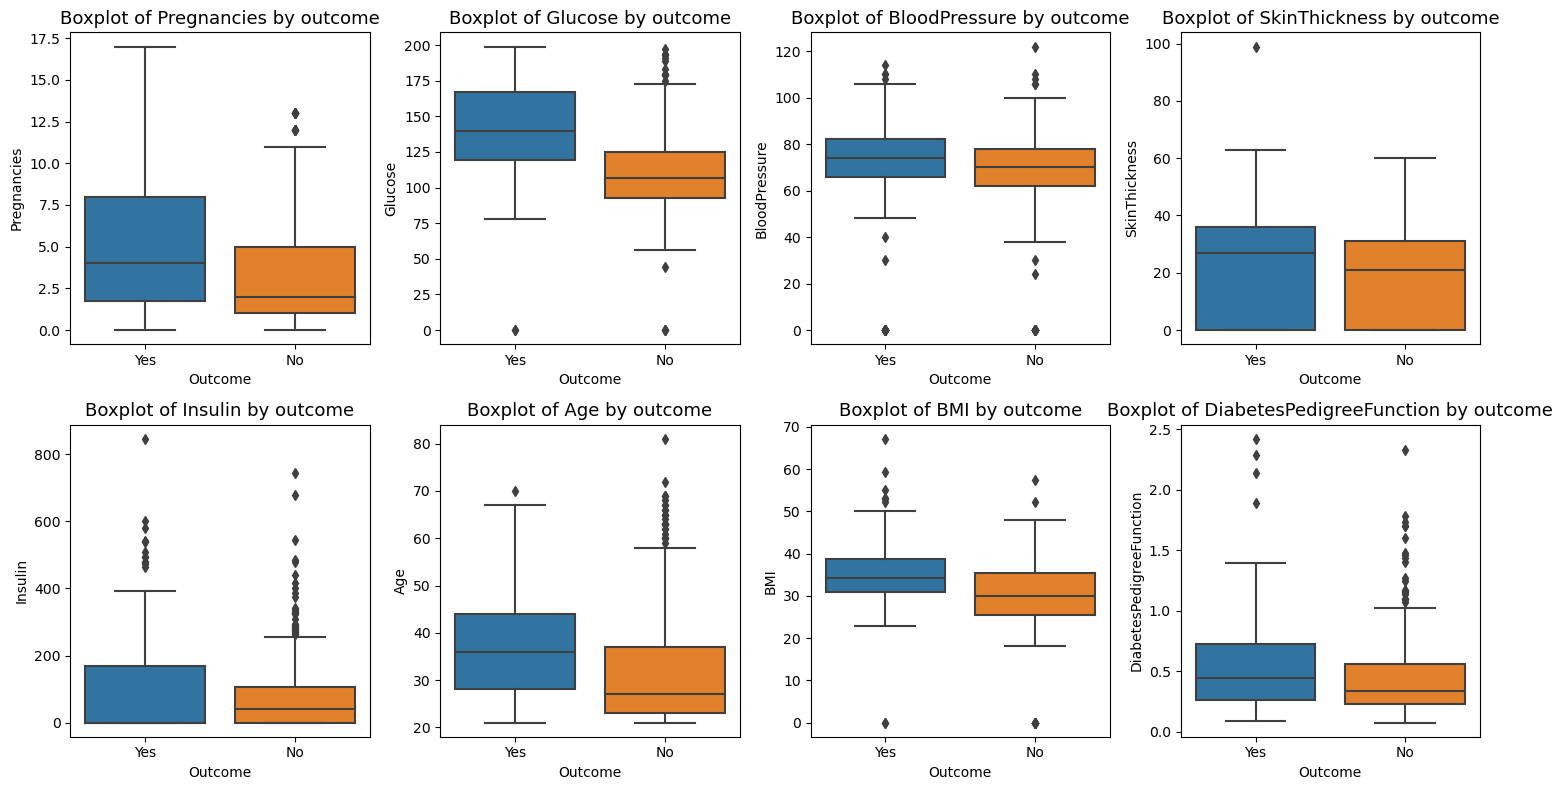

In [30]:
num_var = []

num_var =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','BMI',"DiabetesPedigreeFunction"]

fig, axs=plt.subplots(2,4,figsize=(15,8))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.boxplot(y=var, x='Outcome', data=data, ax=axs[i])
    axs[i].set_title(f"Boxplot of {var} by outcome", fontsize=13)
fig.tight_layout()


plt.show()

**Handling Outliers**

In [34]:
from scipy import stats

z_scores = stats.zscore(data[num_var])

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

data = data[~outliers]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               729 non-null    int64  
 1   Glucose                   729 non-null    int64  
 2   BloodPressure             729 non-null    int64  
 3   SkinThickness             729 non-null    int64  
 4   Insulin                   729 non-null    int64  
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  729 non-null    float64
 7   Age                       729 non-null    int64  
 8   Outcome                   729 non-null    object 
 9   Age_category              729 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 62.6+ KB


**statistical description of the dataset**

In [35]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.831276,119.331962,68.975309,19.925926,68.460905,31.830453,0.450209,32.908093
std,3.294235,31.371613,19.438673,15.618828,89.094492,7.514788,0.282474,11.293709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.243000,24.000000
50%,3.000000,115.000000,72.000000,22.000000,15.000000,32.000000,0.364000,29.000000
75%,6.000000,138.000000,80.000000,32.000000,120.000000,36.300000,0.601000,40.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000


In [41]:
#checking for missing values

check_missing = data.isnull().sum() * 100/data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


Series([], dtype: float64)

**Correlation plot**

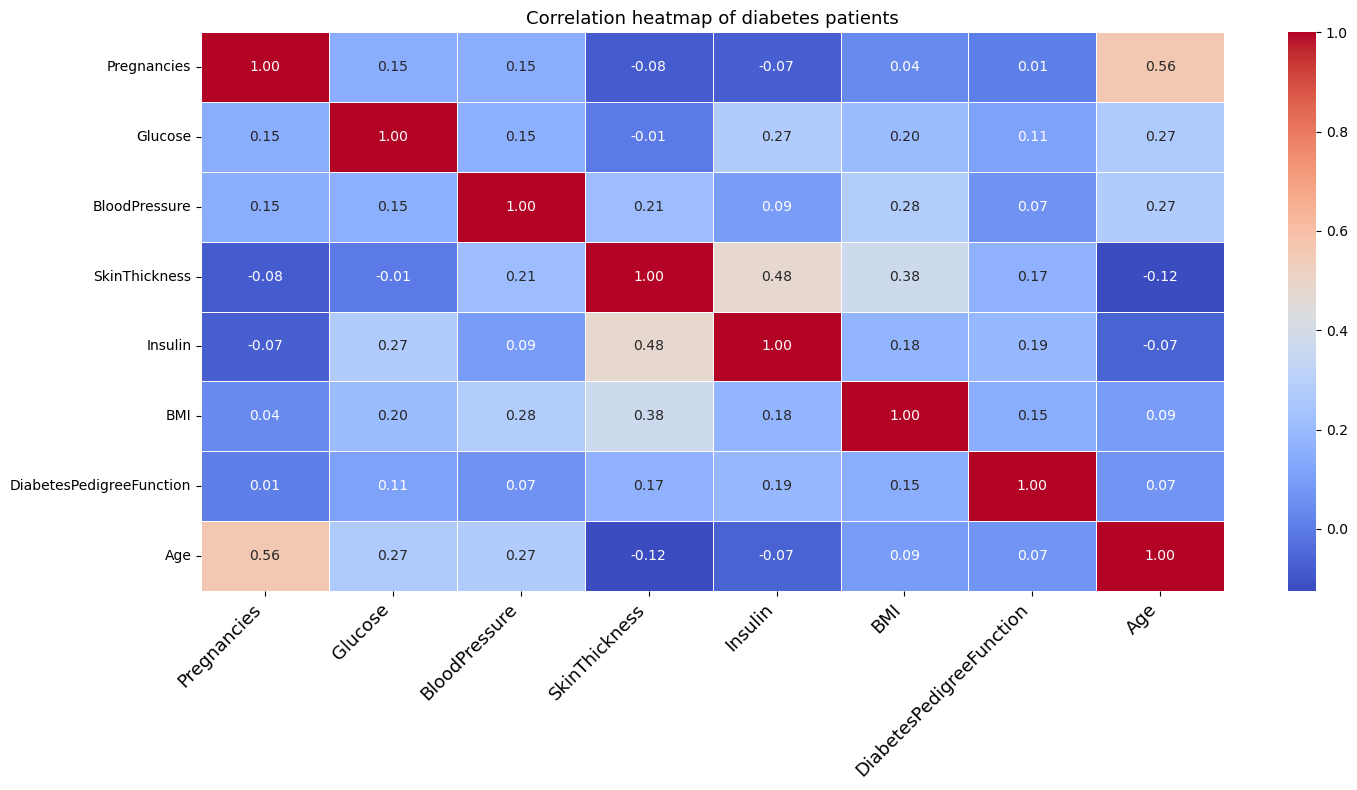

In [46]:
num_var = data.select_dtypes(include='number')

plt.figure(figsize=(15,8))
sns.heatmap(num_var.corr(), linewidths=0.5 ,annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap of diabetes patients', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=13)

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

Label Encode category variables

In [55]:
cat_var = ['Outcome','Age_category']

label_encoder = LabelEncoder()

for col in cat_var:
    data.loc[:,col] = label_encoder.fit_transform(data[col])

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,4
5,5,116,74,0,0,25.6,0.201,30,0,0


Standard Scaler

In [56]:
scaler = StandardScaler()
scaler.fit(data)

data[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,4
5,5,116,74,0,0,25.6,0.201,30,0,0


Train Test split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Outcome']), data['Outcome'], test_size=0.2, random_state=42)

print('Testing set:', X_test.shape, y_test.shape)
print('Training set:', X_train.shape, y_train.shape)

Testing set: (146, 9) (146,)
Training set: (583, 9) (583,)


**Model Selection**
For predicting the diabetes outcome of patients. I'll be using the following Machine Learning algorithm.

`1` SVM\
`2` XGBoost

**SVM Model**

In [18]:
SVM_model = SVC()

params_grid = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),  # Regularization parameter
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),  # Kernel type
    'degree': Integer(1, 10),  # Degree of the polynomial kernel
    'coef0': Real(-1, 1),
}

bayes_search = BayesSearchCV(SVM_model, params_grid, cv=5, error_score='raise')
bayes_search.fit(X_train, y_train)

print('Best parameter:', bayes_search.best_params_)
print('Best Score:', bayes_search.best_score_)

best_svm_params = bayes_search.best_params_

In [19]:
SVM_model = SVC(**best_svm_params)

SVM_model.fit(X_train, y_train)

SVM_model

In [23]:
SVM_pred = SVM_model.predict(X_test)

SVM_pred[0:5]

**XGBoost Model**

In [24]:
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0,0.1,0.2],
    'min_child_weight':[1,2,3]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

print('Best Hyperparameter:',grid_search.best_params_)
print('Best Score(Accuracy);', grid_search.best_score_)

best_xgb_params = grid_search.best_params_

In [25]:
xgb_model = XGBClassifier(**best_xgb_params)

xgb_model.fit(X_train, y_train)

xgb_model

In [26]:
xgb_pred = xgb_model.predict(X_test)

xgb_pred[0:5]

**Model Evaluation**

In [ ]:
def plot_confusion_matrix(y_true, y_preds, model_names):
    fig, axes = plt.subplots(1, len(y_preds), figsize=(18,7))
    
    for i, (pred, model_name) in enumerate(zip(y_preds, model_names)):
        
        cm = confusion_matrix(y_true, pred)
        ax = axes[i]
        sns.heatmap(cm, annot=True, ax=ax, cmap='coolwarm')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.xaxis.set_ticklabels(['False Positive', 'True Negative'])
        ax.yaxis.set_ticklabels(['True Positive ', 'False Negative'])
    
    plt.tight_layout()    
    plt.show()


In [ ]:
y_true = y_test
y_preds= [xgb_pred, SVM_pred ]
model_names = ['XGBoost Classifier','SVM']
plot_confusion_matrix(y_true, y_preds, model_names)

**Making a Predictive System**

In [32]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [33]:
#for saving the model
import pickle

In [34]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [35]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [36]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
